In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/datascience/alumni_project")
!ls

cleaned_skills_df.csv  skill_cleaned_with_emsi_dataset.csv
emsi_skills.csv        skills_translated.csv
Skill_cleaned.csv


# Load and Clean Dataset

In [ ]:
skill_df = pd.read_csv('skills_translated.csv')
skill_df['Skill_English']=skill_df['Skill_English'].apply(lambda x: list(eval(x)))

In [ ]:
skill_df=skill_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
skill_df.columns

Index(['Name', 'Skills', 'Skill_English'], dtype='object')

In [ ]:
# Dataset cleaning
#remove strange skill names
strange_indexes = []
for i in range(skill_df.shape[0]):
  person_i_skills = skill_df.loc[i,'Skill_English']
  for skill_i in person_i_skills:
    skill_len = len(skill_i)
    if skill_len>100:
      print("Very long skill name on ",i)
      print(skill_i)
      strange_indexes.append(i)

for i in strange_indexes:
  person_i_skills = skill_df.loc[i,'Skill_English']
  cleaned_skills =[]
  for skill_i in person_i_skills:
    skill_len = len(skill_i)
    if skill_len<100:
      cleaned_skills.append(skill_i)
  skill_df.at[i,'Skill_English'] = cleaned_skills

Very long skill name on  154
RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT RT

The skill dataset needs to be cleaned.

In [ ]:
skill_df

Name  \
0    0064692b7bc52326414c8f9c2bfe0445   
1    00b11a3e2e7ad34edddea58da8c29836   
2    00b1a8c869074d20e1dac21d3662e82f   
3    0425089f7a7b809453459d3a134d7461   
4    059b4e93e91a30445d63f15920feaea2   
..                                ...   
490  fd9465db07ae3ed0df041eda32819662   
491  fd9e1c29af79ecdaedb5432dccb96368   
492  feb5c4ba7bdc0267244f037909e49d05   
493  ff704be441e47280732e978b72519bc8   
494  ffec44e5cdbb54492115b46d502e3af4   

                                                Skills  \
0    {'Programming', 'Computational Modeling', 'Neu...   
1    {'Microsoft Outlook', 'Basecamp', 'Fundraising...   
2      {'Linux', 'Laboratoire', 'Recherche', 'Python'}   
3    {'Informatique', 'Microsoft Office', 'physique...   
4    {'Tissue Culture', 'Microsoft Office', 'Assay ...   
..                                                 ...   
490                                              set()   
491  {'Music Theory', 'Piano Playing', 'Classical B...   
492  {'Microsoft Office', 'Science', "Gestion d'un ...   
493  {'Science', 'English', 'Public Speaking', 'Tea...   
494  {'Management', 'Microsoft Office', 'Anglais', ...   

                                         Skill_English  
0    [Literature Reviews, Computational Modeling, A...  
1    [Salesforce.com Administration, Google Suite, ...  
2                [Research, Laboratory, Python, Linux]  
3    [Biology, Mathematics, Microsoft Office, Infor...  
4    [Bacterial Cell Culture, Molecular Biology, Po...  
..                                                 ...  
490                                                 []  
491  [Music Theory, Seam, Piano Playing, Classical ...  
492  [Talking in public, Responsible, Group managem...  
493  [English, Teamwork, Microsoft Word, Science, P...  
494  [Talking in public, Mathematics, Marketing com...  

[495 rows x 3 columns]

In [ ]:
skills = list(skill_df['Skill_English'])

skills[:3]

[['Literature Reviews',
  'Computational Modeling',
  'Animal Behavior',
  'Python (Programming Language)',
  'Research',
  'Science',
  'Organization Skills',
  'Cognitive Neuroscience',
  'Programming',
  'Deep Learning',
  'Artificial Neural Networks',
  'Neuroscience',
  'NEURON',
  'Artificial Intelligence',
  'Design of Experiments',
  'Microsoft Office',
  'Python',
  'Data Analysis',
  'Matlab',
  'Scientific Writing',
  'Experimental Research',
  'Statistics',
  'in Vivo Electrophysiology',
  'SPSS',
  'LaTeX',
  'Mathematical Modeling',
  'Machine Learning'],
 ['Salesforce.com Administration',
  'Google Suite',
  'Community Outreach',
  'Research',
  'Basecamp',
  'Microsoft Outlook',
  'Editing',
  'Salesforce.com Development',
  'Confluence',
  'Project Management',
  'Microsoft Office',
  'Teamwork',
  'Management',
  'Customer Service',
  'Fundraising',
  'Social Media Marketing',
  'English',
  'Social Media',
  'Public Speaking',
  'Communication',
  'Academic Writing',

In [ ]:
# Count the total number of skills with repetitions
cnts=0
for i in skills:
  cnts+=len(i)
cnts

6782

# Get skill embedding from NLP pretrained language model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.3 MB/s eta 0:00:00


In [ ]:
pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6427232af756612cf4d03d232456cf3c0a8ddb665a00d87ad3b9a2fd7b037a78
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted","python"]

nlp_encoder_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = nlp_encoder_model.encode(sentences)

In [ ]:
embeddings.shape

(3, 384)

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
dct = Dictionary(skills)

In [ ]:
len(dct)

1930

In [ ]:
print(dct)

Dictionary(1930 unique tokens: ['Animal Behavior', 'Artificial Intelligence', 'Artificial Neural Networks', 'Cognitive Neuroscience', 'Computational Modeling']...)


In [ ]:
print(dct.token2id)

{'Animal Behavior': 0, 'Artificial Intelligence': 1, 'Artificial Neural Networks': 2, 'Cognitive Neuroscience': 3, 'Computational Modeling': 4, 'Data Analysis': 5, 'Deep Learning': 6, 'Design of Experiments': 7, 'Experimental Research': 8, 'LaTeX': 9, 'Literature Reviews': 10, 'Machine Learning': 11, 'Mathematical Modeling': 12, 'Matlab': 13, 'Microsoft Office': 14, 'NEURON': 15, 'Neuroscience': 16, 'Organization Skills': 17, 'Programming': 18, 'Python': 19, 'Python (Programming Language)': 20, 'Research': 21, 'SPSS': 22, 'Science': 23, 'Scientific Writing': 24, 'Statistics': 25, 'in Vivo Electrophysiology': 26, 'Academic Writing': 27, 'Basecamp': 28, 'Communication': 29, 'Community Outreach': 30, 'Confluence': 31, 'Customer Service': 32, 'Editing': 33, 'English': 34, 'Event Planning': 35, 'Fundraising': 36, 'Google Suite': 37, 'Google+': 38, 'Management': 39, 'Microsoft Excel': 40, 'Microsoft Outlook': 41, 'Microsoft PowerPoint': 42, 'Microsoft Word': 43, 'Project Management': 44, 'Pu

In [ ]:
dct.num_docs

495

In [ ]:
idxes = []
skill_dct = []
for key,value in dct.iteritems():
  idxes.append(key)
  skill_dct.append(value)

In [ ]:
print(idxes[:3])
print(skill_dct[:3])

[0, 1, 2]
['Animal Behavior', 'Artificial Intelligence', 'Artificial Neural Networks']


In [ ]:
skill_embeddings = nlp_encoder_model.encode(skill_dct)

In [ ]:
print(len(skill_dct))
print(skill_embeddings.shape)

1930
(1930, 384)


# Visualize word embeddings to reveal the problem of tautology 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
standardized_data = StandardScaler().fit_transform(skill_embeddings.astype(float))
print(skill_embeddings.shape)

(1930, 384)


In [ ]:
# TSNE

data = standardized_data[:,:]

# since t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
# random_state=0 makes sure the results are not different everytime t-SNE is run.
model = TSNE(n_components=2, random_state=0) 
# Configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.Series(skill_dct)

0                  Animal Behavior
1          Artificial Intelligence
2       Artificial Neural Networks
3           Cognitive Neuroscience
4           Computational Modeling
                   ...            
1925              Classical Ballet
1926                  Music Theory
1927                          Seam
1928                   Responsible
1929       Marketing communication
Length: 1930, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


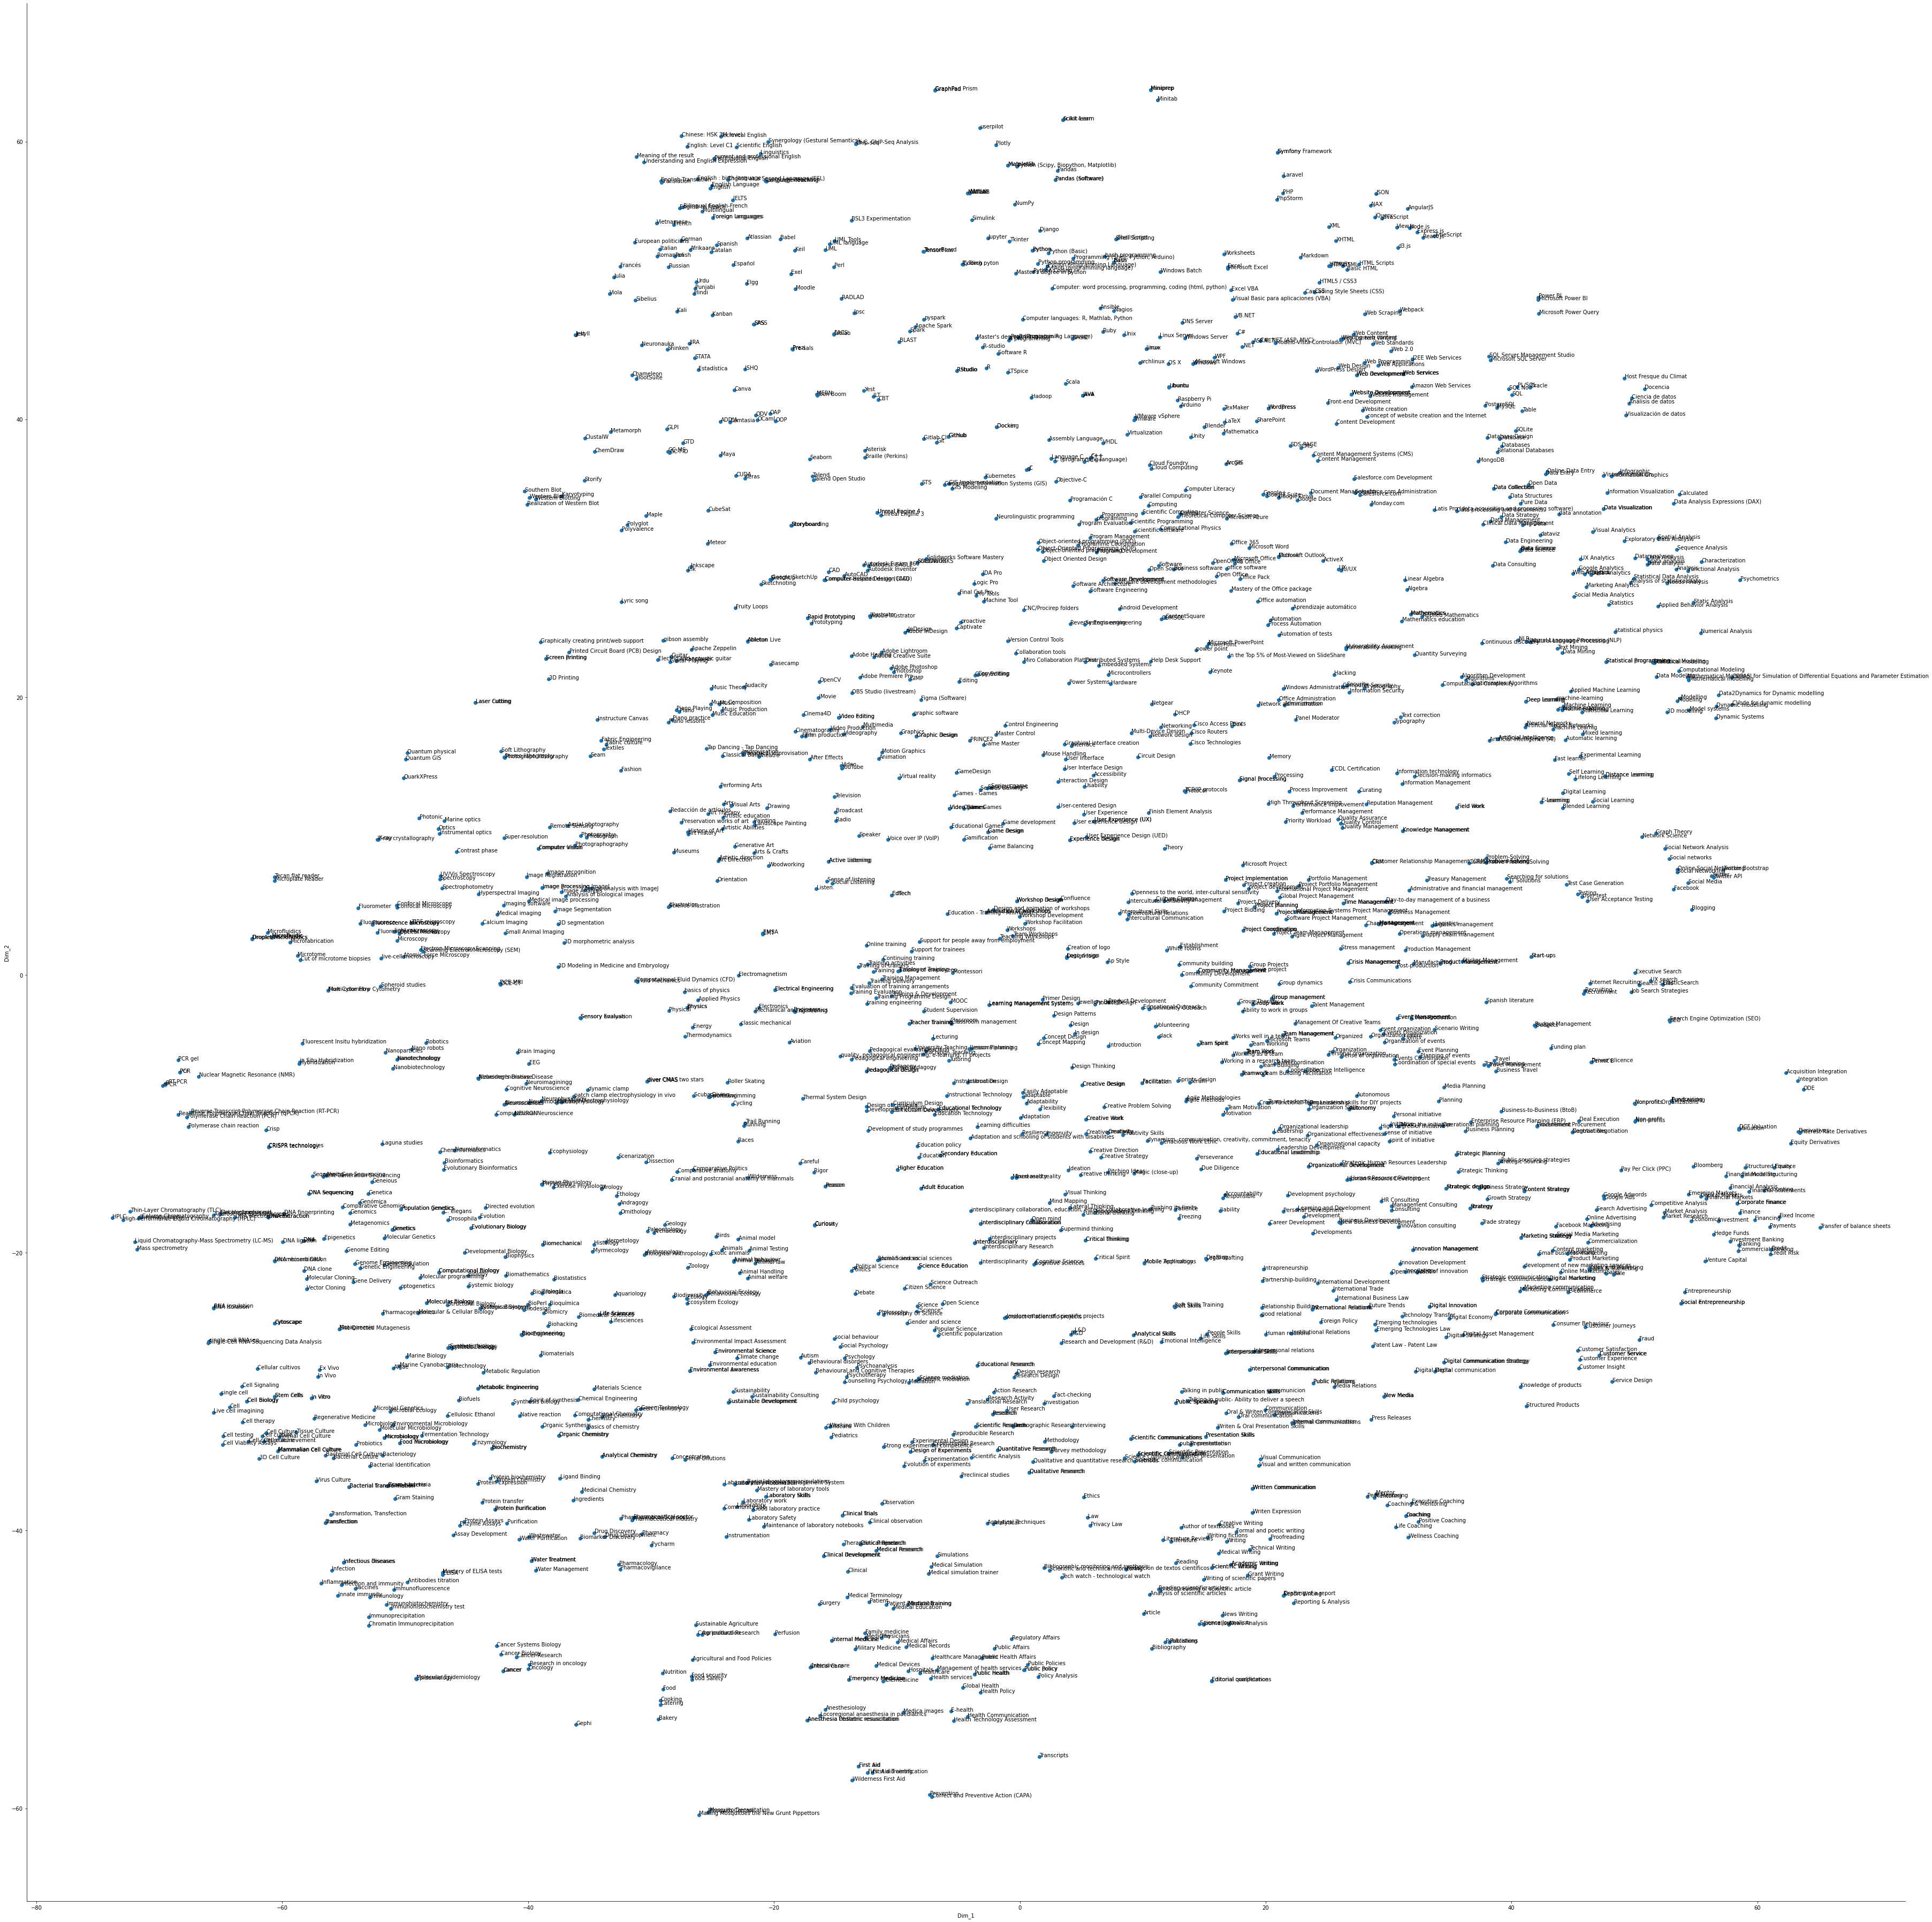

In [ ]:

# Creating a new data frame which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
ax = sns.FacetGrid(tsne_df,  height=6, size=50).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(tsne_df.Dim_1, tsne_df.Dim_2, pd.Series(skill_dct), plt.gca()) 
plt.show()

1. Cluster in high dimension space and then map 2D _______ try this one
2. DImensionality reduction first

PCA before
TF-IDF to identify relevant clusters

Hypergeometric p value to get edge weights

Uncommon skills in the same person get larger sets


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2).fit(data)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


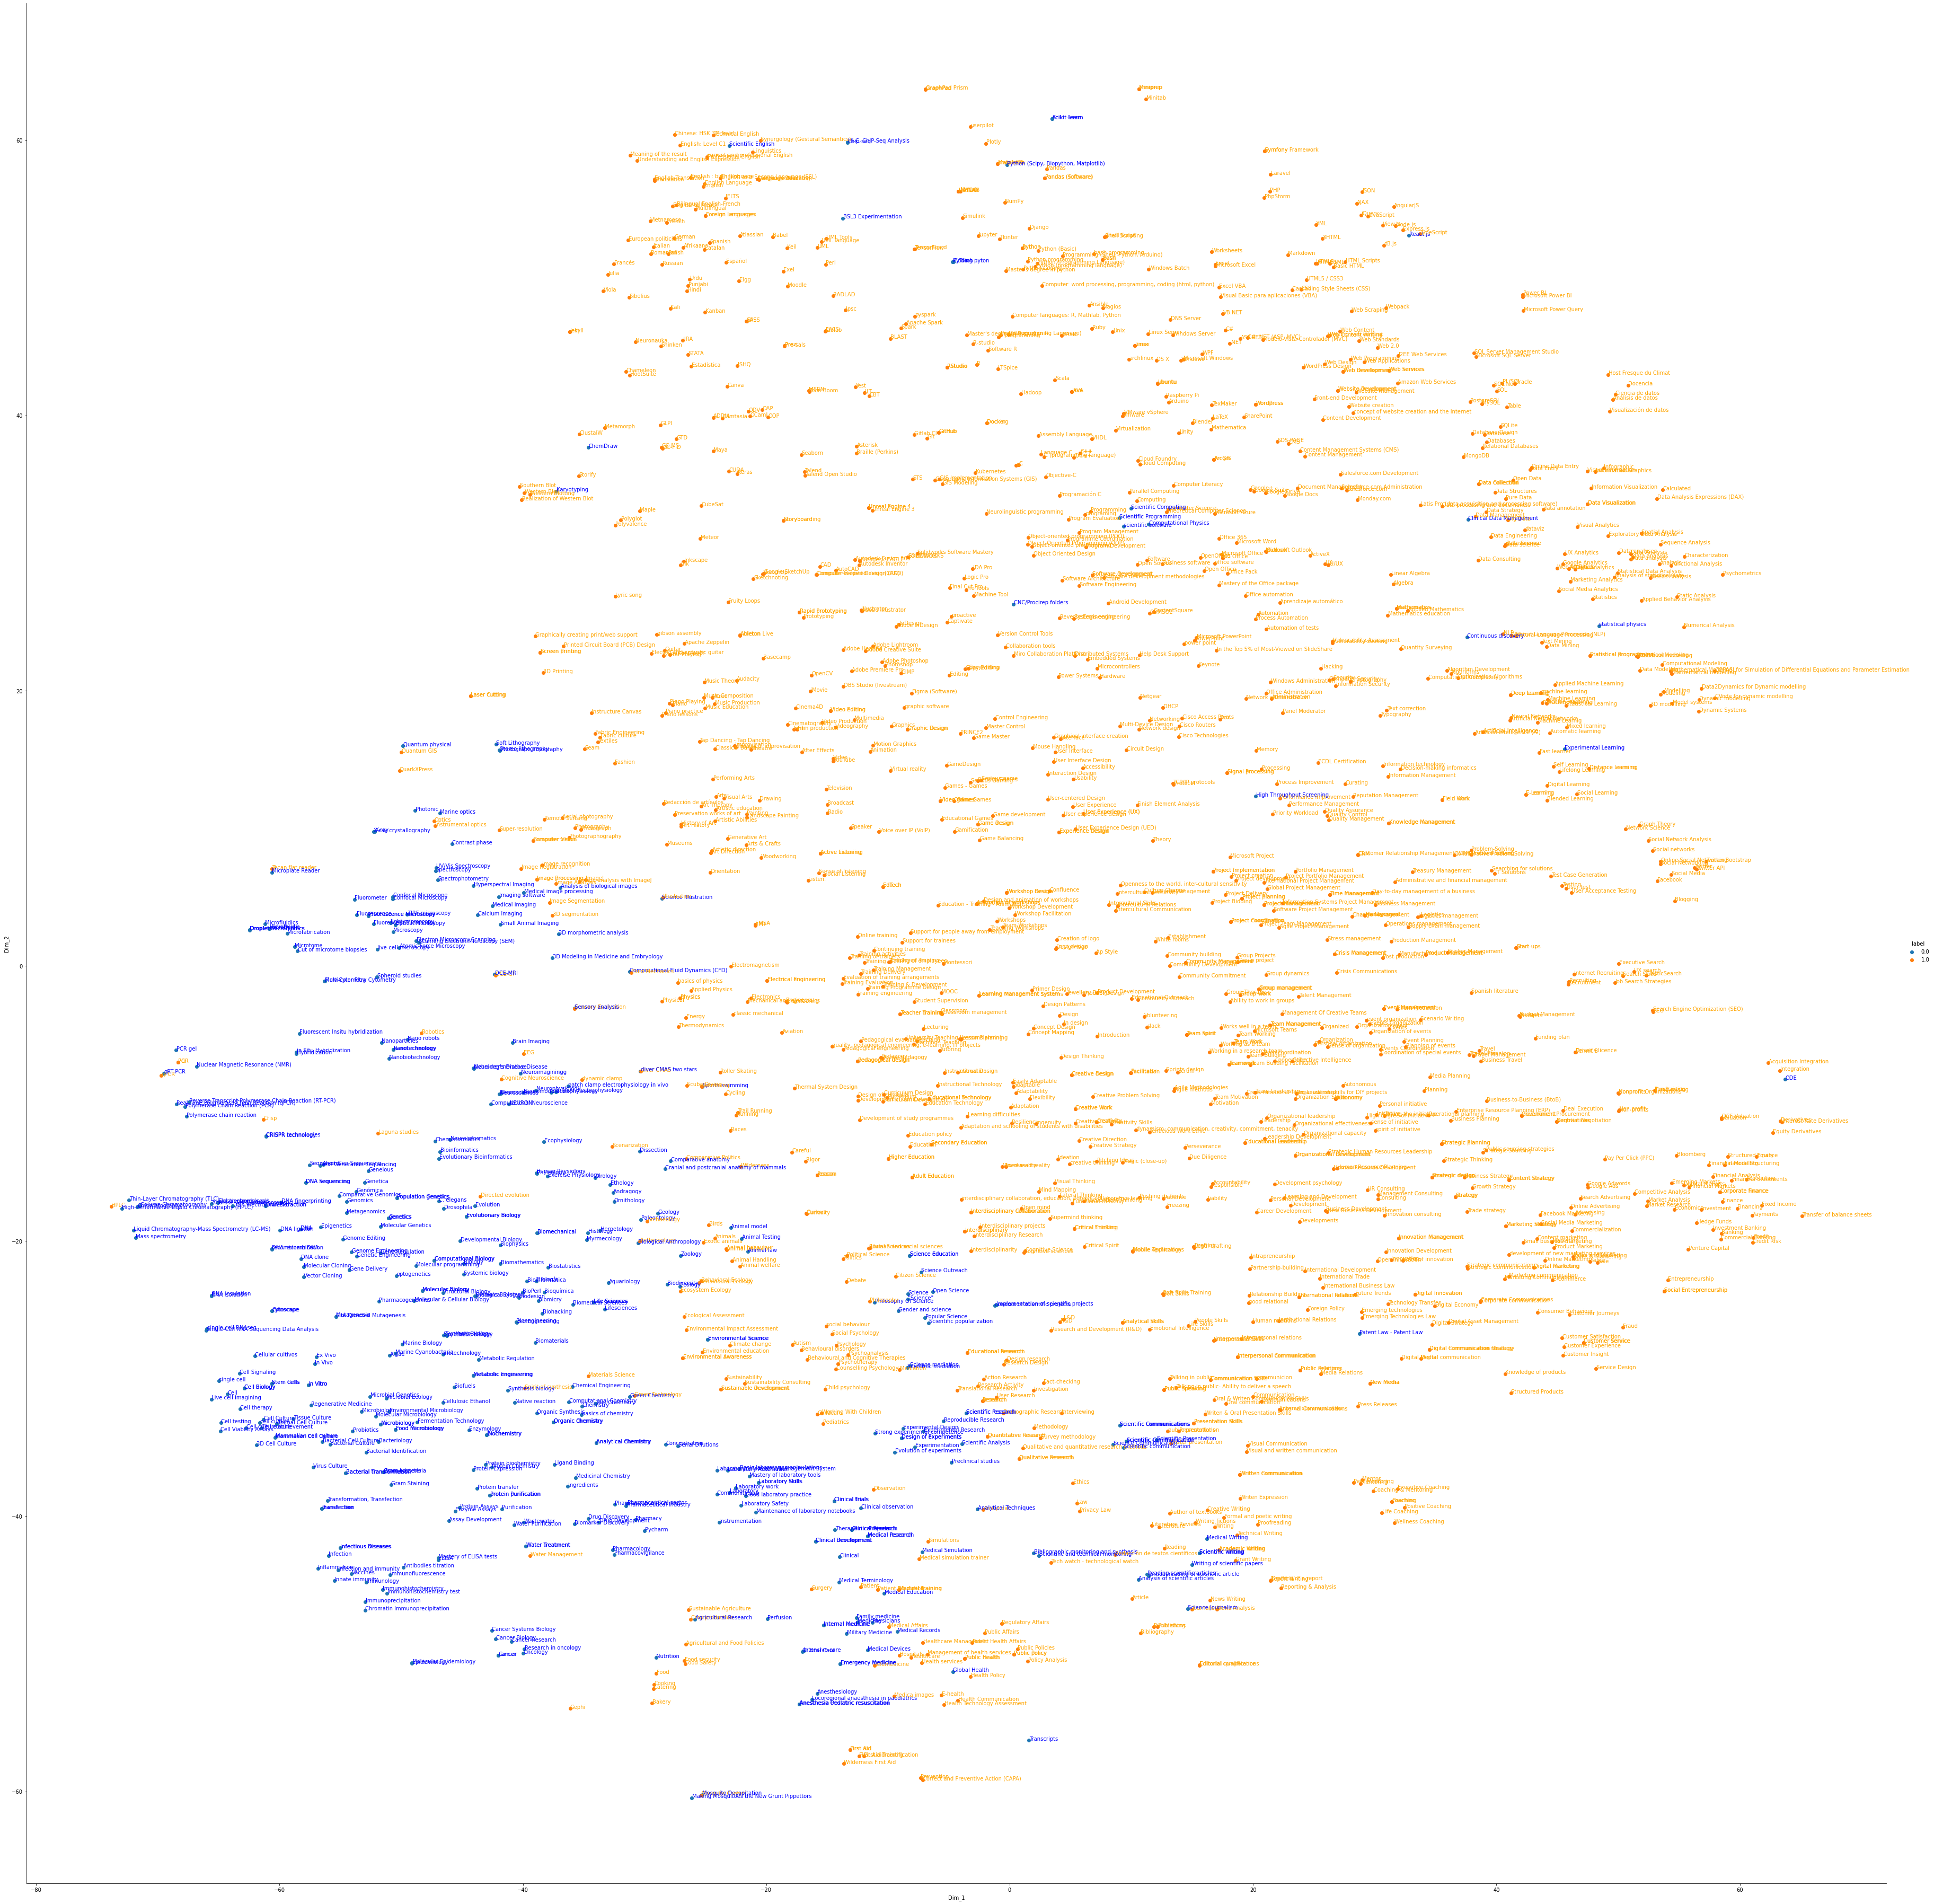

In [ ]:
# Creating a new data frame which helps us in ploting the result data
clustered_tsne_data = np.vstack((tsne_data.T, kmeans.labels_)).T
tsne_df = pd.DataFrame(data=clustered_tsne_data, columns=("Dim_1", "Dim_2", "label"))
palette = {
    0: 'tab:blue',
    1: 'tab:orange'
}
# Ploting the result of tsne
ax = sns.FacetGrid(tsne_df,  hue="label", height=6, size=50,palette=palette).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
def label_point(x, y, val,label, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val,'label':label}, axis=1)
    for i, point in a.iterrows():
      if point['label']==0:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='blue')
      else:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='orange')

label_point(tsne_df.Dim_1, tsne_df.Dim_2, pd.Series(skill_dct),tsne_df['label'], plt.gca()) 
plt.show()

# Use emsi skill dataset hierarchy to reduce skill names and form hierarchy in our own dataset

In [ ]:
skill_set = pd.read_csv('emsi_skills.csv',sep=';')
skill_set.head(5)

id                                            infoUrl  \
0  KS126XS6CQCFGC3NG79X  https://skills.emsidata.com/skills/KS126XS6CQC...   
1  ES50D03AC9CFC1A0BC93  https://skills.emsidata.com/skills/ES50D03AC9C...   
2  KS1200B62W5ZF38RJ7TD  https://skills.emsidata.com/skills/KS1200B62W5...   
3  KS126XW78QJCF4TRV2X7  https://skills.emsidata.com/skills/KS126XW78QJ...   
4  KS126XY68BNKXSBSLPYS  https://skills.emsidata.com/skills/KS126XY68BN...   

   isLanguage  isSoftware              name            categoryName  \
0       False        True   .NET Assemblies  Information Technology   
1       False       False  .NET Development  Information Technology   
2       False        True    .NET Framework  Information Technology   
3       False        True  .NET Framework 1  Information Technology   
4       False        True  .NET Framework 3  Information Technology   

               subcategoryName  isHardSkill  isSoftSkill  \
0  Microsoft Development Tools         True        False   
1  Microsoft Development Tools         True        False   
2  Microsoft Development Tools         True        False   
3  Microsoft Development Tools         True        False   
4  Microsoft Development Tools         True        False   

                                 wikipediaDefinition  \
0  \nDefined by Microsoft for use in recent versi...   
1  The .NET Framework is a software framework dev...   
2  The .NET Framework is a software framework dev...   
3  Microsoft started development on the .NET Fram...   
4  The .NET Framework is a software framework dev...   

                                       wikipediaUrl  
0     https://en.wikipedia.org/wiki/.NET_assemblies  
1      https://en.wikipedia.org/wiki/.NET_Framework  
2      https://en.wikipedia.org/wiki/.NET_Framework  
3  https://en.wikipedia.org/wiki/.NET_Framework_1.0  
4      https://en.wikipedia.org/wiki/.NET_Framework

In [ ]:
skill_category_sub = skill_set[['id','subcategoryName','categoryName']].groupby(['subcategoryName','categoryName'])['id'].count()
skill_category_sub = pd.DataFrame(skill_category_sub)
skill_category_sub

id
subcategoryName                 categoryName                    
Account Management              Sales                          3
Accounting and Finance Software Finance                       28
Accounts Payable and Receivable Finance                       11
Administrative Support          Administration                10
Advanced Customer Service       Customer and Client Support    6
...                                                           ..
Welding                         Manufacturing and Production  43
Wind Energy                     Energy and Utilities           9
Writing and Editing             Media and Writing             52
XML                             Information Technology        20
iOS Stack                       Information Technology        28

[462 rows x 1 columns]

In [ ]:
skill_set.columns

Index(['id', 'infoUrl', 'isLanguage', 'isSoftware', 'name', 'categoryName',
       'subcategoryName', 'isHardSkill', 'isSoftSkill', 'wikipediaDefinition',
       'wikipediaUrl'],
      dtype='object')

In [ ]:
print(list(skill_set['name']))

['.NET Assemblies', '.NET Development', '.NET Framework', '.NET Framework 1', '.NET Framework 3', '.NET Framework 4', '.NET Reflector', '.NET Remoting', '10 Gigabit Ethernet', '10BASE-F (Physical Layer Protocols)', '10BASE-FL', '10BASE2', '10BASE5', '10G-PON', '123RF (Image Library)', '128bit', '1Password', '2D Animation', '2D Computer Graphics', '2D Computer-Aided Drafting And Design', '3.5G (Telecommunication)', '35 Mm Films', '360-Degree Feedback', '389 Directory Server (Fedora Project)', '3CX Phone Systems', '3D Animation', '3D Art', '3D Camcorder', '3D Computer Graphics', '3D Computer Graphics Software', '3D Conformal Radiotherapy (3DCRT)', '3D Graphic Design', '3D Modeling', '3D Modeling Software', '3D Printing', '3D Projection', '3D Reconstruction', '3D Rendering', '3D Scanning', '3D Visualization', '3DMark (Computer Benchmarking)', '3DSlicer', '3Delight (Software)', '3Dvia Composer', '3GP (Telecommunication)', '3GPP (Telecommunication)', '3GPP2 (Telecommunication)', '3M (Softwa

In [ ]:
lowest_level_skill_names = list(skill_set['name'])

In [ ]:
lowest_level_skill_names_embeddings = nlp_encoder_model.encode(lowest_level_skill_names)

In [ ]:
lowest_level_skill_names_embeddings.shape

(24915, 384)

In [ ]:
len(skill_dct) #Alumni data

1930

In [ ]:
skill_embeddings.shape #Alumni data

(1930, 384)

In [ ]:
coresponding_skill_name = []
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return np.argmin(dist_2)
for i in range(len(skill_dct)):
  print(lowest_level_skill_names[closest_node(skill_embeddings[i,:],lowest_level_skill_names_embeddings)])
  coresponding_skill_name.append(lowest_level_skill_names[closest_node(skill_embeddings[i,:],lowest_level_skill_names_embeddings)])

Animal Science
Artificial Intelligence
Artificial Neural Networks
Cognitive Neuroscience
Computational Modeling
Data Analysis
Deep Learning
Experimental Design
Experimental Psychology
LaTeX
Literature Reviews
Machine Learning
Mathematical Modeling
MATLAB
Microsoft Office
Neurons
Neuroscience
Administrative Skills
Computer Programming
Python (Programming Language)
Python (Programming Language)
Research
SPSS Modeler
Physical Science
Scientific Writing
Statistics
Electrophysiology
Academic Writing
Basecamp
Human Communication
Community Management
Atlassian Confluence
Customer Service
Editing
English Language
Event Planning
Fundraising
Internet Suite
Google+
Management
Microsoft Excel
Microsoft Outlook
Microsoft PowerPoint
Microsoft Word
Project Management
Public Speaking
SharePoint Administration
Salesforce Development
Social Media
Social Media Marketing
Teamwork
Vietnamese Language
Web Development
Medical Laboratory
Linux
Biology
Chemistry
Information Technology
Elementary Mathematics
Ph

In [ ]:
len(coresponding_skill_name) #before reducing

1930

In [ ]:
len(set(coresponding_skill_name)) #reducing with similar names

1380

In [ ]:
# show similar names--- only for understanding
from collections import defaultdict
duplicates = defaultdict(list)

# iterate over positions and numbers simultaneously
for i, number in enumerate(coresponding_skill_name):
    # accumulate positions to the same number
    duplicates[number].append(skill_dct[i])

result = {key: value for key, value in duplicates.items() if len(value) > 1}
print(result)

{'Animal Science': ['Animal Behavior', 'Animal behaviour', 'Animal Testing'], 'Artificial Intelligence': ['Artificial Intelligence', 'Artificial Intelligence (AI)', 'Artificial intelligence'], 'Artificial Neural Networks': ['Artificial Neural Networks', 'Neural Networks'], 'Data Analysis': ['Data Analysis', 'Data analysis', 'Análisis de datos', 'data analysis', 'Data analyses'], 'Deep Learning': ['Deep Learning', 'Deep learning'], 'Experimental Design': ['Design of Experiments', 'Experimental Design', 'Design of experiments'], 'Experimental Psychology': ['Experimental Research', 'Strong experimental competence'], 'Machine Learning': ['Machine Learning', 'Applied Machine Learning', 'machine learning', 'machine-learning', 'Machine Learnig', 'Machine learning'], 'Mathematical Modeling': ['Mathematical Modeling', 'Mathematical modelling'], 'MATLAB': ['Matlab', 'MATLAB', 'matlab'], 'Microsoft Office': ['Microsoft Office', 'Office Pack', 'office software', 'MS Office', 'Open Office'], 'Neuro

In [ ]:
# Construct a dictionary mapping linkedin profile skill name to emsi skill set name
skill_emsi_dct = defaultdict(list)
for i, number in enumerate(coresponding_skill_name):
    skill_emsi_dct[skill_dct[i]]=number

skill_emsi_dct = {key: value for key, value in skill_emsi_dct.items()}
print(skill_emsi_dct)

{'Animal Behavior': 'Animal Science', 'Artificial Intelligence': 'Artificial Intelligence', 'Artificial Neural Networks': 'Artificial Neural Networks', 'Cognitive Neuroscience': 'Cognitive Neuroscience', 'Computational Modeling': 'Computational Modeling', 'Data Analysis': 'Data Analysis', 'Deep Learning': 'Deep Learning', 'Design of Experiments': 'Experimental Design', 'Experimental Research': 'Experimental Psychology', 'LaTeX': 'LaTeX', 'Literature Reviews': 'Literature Reviews', 'Machine Learning': 'Machine Learning', 'Mathematical Modeling': 'Mathematical Modeling', 'Matlab': 'MATLAB', 'Microsoft Office': 'Microsoft Office', 'NEURON': 'Neurons', 'Neuroscience': 'Neuroscience', 'Organization Skills': 'Administrative Skills', 'Programming': 'Computer Programming', 'Python': 'Python (Programming Language)', 'Python (Programming Language)': 'Python (Programming Language)', 'Research': 'Research', 'SPSS': 'SPSS Modeler', 'Science': 'Physical Science', 'Scientific Writing': 'Scientific Wr

In [ ]:
skill_emsi_dct['Animal Behavior']

'Animal Science'

emsi skill name level

In [ ]:
cleaned_emsi_skills = []
for person_i_skills in skills:
  clean_person_i_skills=[]
  for skill_j in person_i_skills:
    clean_person_i_skills.append(skill_emsi_dct[skill_j])
  cleaned_emsi_skills.append(clean_person_i_skills)
  # cleaned_emsi_skills.append(list(set(clean_person_i_skills)))
skill_df['Skill_cleaned']=cleaned_emsi_skills

emsi skill sub-category level

In [ ]:
cleaned_emsi_subcategoryName = []
for person_i_skills in cleaned_emsi_skills:
  clean_person_i_subcategoryName=[]
  for skill_j in person_i_skills:
    subcategory_i = skill_set[skill_set['name']==skill_j]['subcategoryName'].values[0]
    clean_person_i_subcategoryName.append(subcategory_i)
  cleaned_emsi_subcategoryName.append(clean_person_i_subcategoryName)
skill_df['subcategoryName']=cleaned_emsi_subcategoryName

emsi skill category level



In [ ]:
cleaned_emsi_categoryName = []
for person_i_skills in cleaned_emsi_skills:
  clean_person_i_categoryName=[]
  for skill_j in person_i_skills:
    categoryName_i = skill_set[skill_set['name']==skill_j]['categoryName'].values[0]
    clean_person_i_categoryName.append(categoryName_i)
  cleaned_emsi_categoryName.append(clean_person_i_categoryName)
skill_df['categoryName']=cleaned_emsi_categoryName

In [ ]:
skill_comparasion_df = pd.DataFrame(data=[skills[0],cleaned_emsi_skills[0],cleaned_emsi_subcategoryName[0],cleaned_emsi_categoryName[0]],index=['original_name','cleaned_name','subcategoryName','subcategoryName'])
skill_comparasion_df

0   \
original_name                 Literature Reviews   
cleaned_name                  Literature Reviews   
subcategoryName  Literature and Literary Studies   
subcategoryName                Media and Writing   

                                                    1                     2   \
original_name                   Computational Modeling       Animal Behavior   
cleaned_name                    Computational Modeling        Animal Science   
subcategoryName  Mathematics and Mathematical Modeling               Biology   
subcategoryName                               Analysis  Science and Research   

                                            3                     4   \
original_name    Python (Programming Language)              Research   
cleaned_name     Python (Programming Language)              Research   
subcategoryName            Scripting Languages  Research Methodology   
subcategoryName         Information Technology  Science and Research   

                                      5                       6   \
original_name                    Science     Organization Skills   
cleaned_name            Physical Science   Administrative Skills   
subcategoryName  Earth and Space Science  Administrative Support   
subcategoryName     Science and Research          Administration   

                                     7                       8   \
original_name    Cognitive Neuroscience             Programming   
cleaned_name     Cognitive Neuroscience    Computer Programming   
subcategoryName               Neurology        Computer Science   
subcategoryName             Health Care  Information Technology   

                                                                9   ...  \
original_name                                        Deep Learning  ...   
cleaned_name                                         Deep Learning  ...   
subcategoryName  Artificial Intelligence and Machine Learning (...  ...   
subcategoryName                             Information Technology  ...   

                            17                     18                   19  \
original_name    Data Analysis                 Matlab   Scientific Writing   
cleaned_name     Data Analysis                 MATLAB   Scientific Writing   
subcategoryName  Data Analysis  Mathematical Software  Writing and Editing   
subcategoryName       Analysis               Analysis    Media and Writing   

                                                       20          21  \
original_name                       Experimental Research  Statistics   
cleaned_name                      Experimental Psychology  Statistics   
subcategoryName  Mental and Behavioral Health Specialties  Statistics   
subcategoryName                               Health Care    Analysis   

                                        22                    23     24  \
original_name    in Vivo Electrophysiology                  SPSS  LaTeX   
cleaned_name             Electrophysiology          SPSS Modeler  LaTeX   
subcategoryName                 Cardiology  Statistical Software    NaN   
subcategoryName                Health Care              Analysis    NaN   

                                                    25  \
original_name                    Mathematical Modeling   
cleaned_name                     Mathematical Modeling   
subcategoryName  Mathematics and Mathematical Modeling   
subcategoryName                               Analysis   

                                                                26  
original_name                                     Machine Learning  
cleaned_name                                      Machine Learning  
subcategoryName  Artificial Intelligence and Machine Learning (...  
subcategoryName                             Information Technology  

[4 rows x 27 columns]

In [ ]:
# remove repetitions
cleaned_emsi_skills = []
for person_i_skills in skills:
  clean_person_i_skills=[]
  for skill_j in person_i_skills:
    clean_person_i_skills.append(skill_emsi_dct[skill_j])
  cleaned_emsi_skills.append(list(set(clean_person_i_skills)))
skill_df['Skill_cleaned']=cleaned_emsi_skills

cleaned_emsi_subcategoryName = []
for person_i_skills in cleaned_emsi_skills:
  clean_person_i_subcategoryName=[]
  for skill_j in person_i_skills:
    subcategory_i = skill_set[skill_set['name']==skill_j]['subcategoryName'].values[0]
    if pd.isnull(subcategory_i):
      subcategory_i='nan' # treat nan as a special group
    clean_person_i_subcategoryName.append(subcategory_i)
  cleaned_emsi_subcategoryName.append(list(set(clean_person_i_subcategoryName)))
skill_df['subcategoryName']=cleaned_emsi_subcategoryName


cleaned_emsi_categoryName = []
for person_i_skills in cleaned_emsi_skills:
  clean_person_i_categoryName=[]
  for skill_j in person_i_skills:
    categoryName_i = skill_set[skill_set['name']==skill_j]['categoryName'].values[0]
    if pd.isnull(categoryName_i):
      categoryName_i='nan' # treat nan as a special group
    clean_person_i_categoryName.append(categoryName_i)
  cleaned_emsi_categoryName.append(list(set(clean_person_i_categoryName)))
skill_df['categoryName']=cleaned_emsi_categoryName

In [ ]:
skill_df.to_csv('skill_cleaned_with_emsi_dataset.csv')